# Problem Statement:
    The high rate of employee attrition poses significant challenges for organizations, impacting productivity, morale, and operational costs. This analysis aims to explore the factors contributing to employee attrition by conducting Exploratory Data Analysis (EDA) and applying machine learning classification algorithms to predict whether an employee is likely to leave the company. The goal is to identify key drivers of attrition and build a predictive model that can help HR departments make data-driven decisions to reduce attrition rates.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("Employee_Attrition.csv")

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# df Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
# Statistical summary for numerical columns
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Checking Duplicate Record

In [11]:
df.duplicated().sum()

3008

In [12]:
# 3008 gets duplicate records.So now drop duplicate records

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(11991, 10)

In [15]:
#3008 records are dropped

In [16]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [17]:
for i in df:
    print(df[i].value_counts())
    print()

satisfaction_level
0.74    214
0.10    203
0.73    201
0.50    200
0.72    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: count, Length: 92, dtype: int64

last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: count, Length: 65, dtype: int64

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

average_montly_hours
156    112
149    112
160    111
151    107
135    104
      ... 
298      5
302      5
297      5
299      5
303      5
Name: count, Length: 215, dtype: int64

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

Work_accident
0    10141
1     1850
Name: count, dtype: int64

left
0    10000
1     1991
Name: count, dtype: int64

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

Department
sales 

In [18]:
# df Visualization and Exploration

In [19]:
df["left"].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Axes: xlabel='left'>

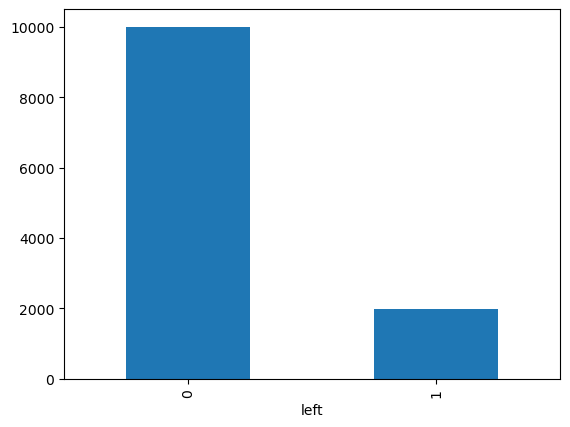

In [20]:
df["left"].value_counts().plot(kind='bar')

In [21]:
# Impact of salary on employee retention

In [22]:
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


<Axes: xlabel='salary'>

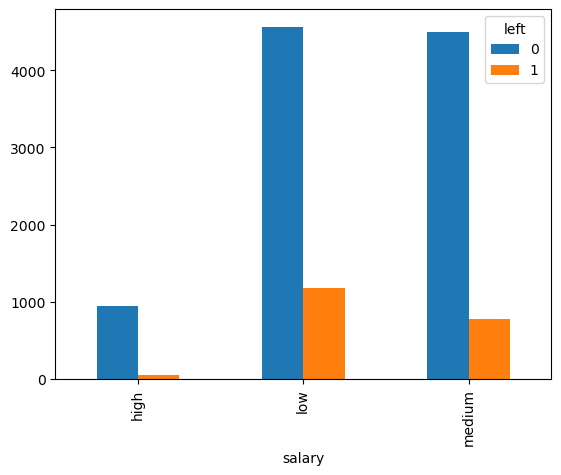

In [23]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [24]:
# Above bar chart shows employees with high salaries do not leave the company.

In [25]:
# Department wise employee  retention rate

In [26]:
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


<Axes: xlabel='Department'>

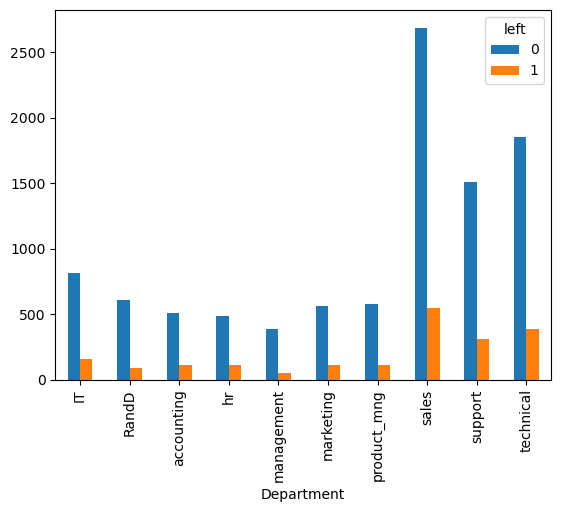

In [27]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [28]:
# Outlier detection on numerical columns using IQR method
numerical_columns = [ 'number_project', 'average_montly_hours', 'time_spend_company',
                     'satisfaction_level', 'last_evaluation']

# Check outliers

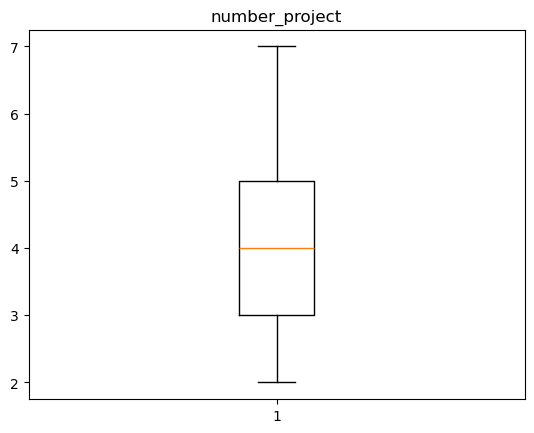

Q1= 3.0
Q2= 4.0
Q3= 5.0
IQR= 2.0
Upper_Whisker= 8.0
Lower_Whisker= 0.0


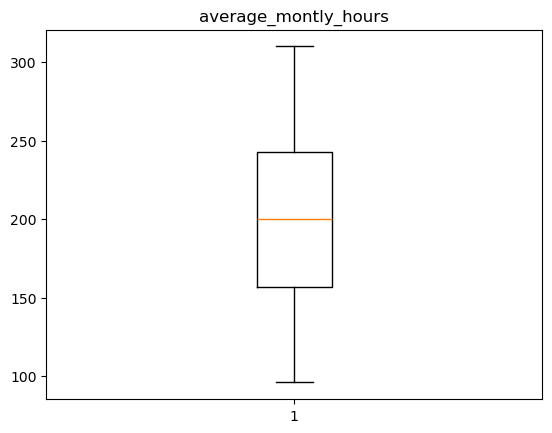

Q1= 157.0
Q2= 200.0
Q3= 243.0
IQR= 86.0
Upper_Whisker= 372.0
Lower_Whisker= 28.0


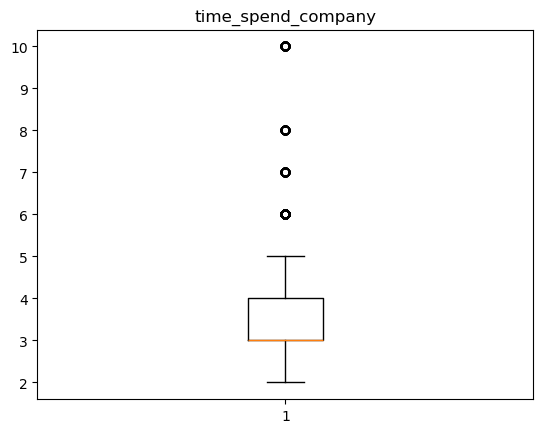

Q1= 3.0
Q2= 3.0
Q3= 4.0
IQR= 1.0
Upper_Whisker= 5.5
Lower_Whisker= 1.5


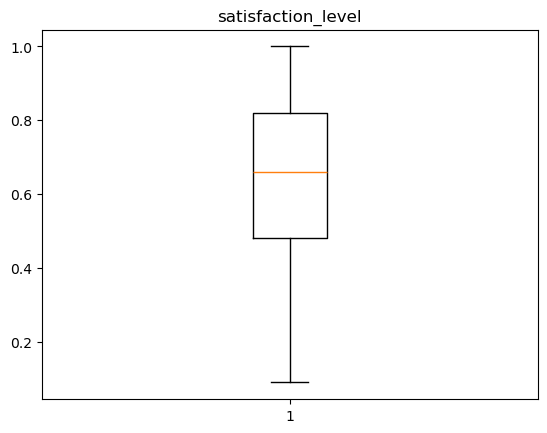

Q1= 0.48
Q2= 0.66
Q3= 0.82
IQR= 0.33999999999999997
Upper_Whisker= 1.33
Lower_Whisker= -0.030000000000000027


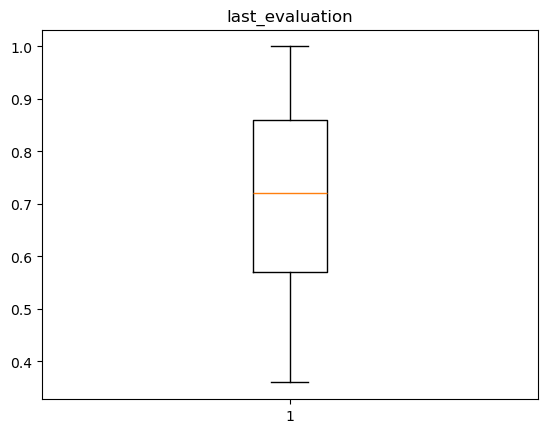

Q1= 0.57
Q2= 0.72
Q3= 0.86
IQR= 0.29000000000000004
Upper_Whisker= 1.295
Lower_Whisker= 0.1349999999999999


In [30]:
for i in numerical_columns:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()    
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    q2=df[i].quantile(0.50)
    iqr=q3-q1
    upper_tail=q3+1.5*iqr
    lower_tail=q1-1.5*iqr
    print("Q1=",q1)
    print("Q2=",q2)
    print("Q3=",q3)
    print("IQR=",iqr)
    print("Upper_Whisker=",upper_tail)
    print("Lower_Whisker=",lower_tail)

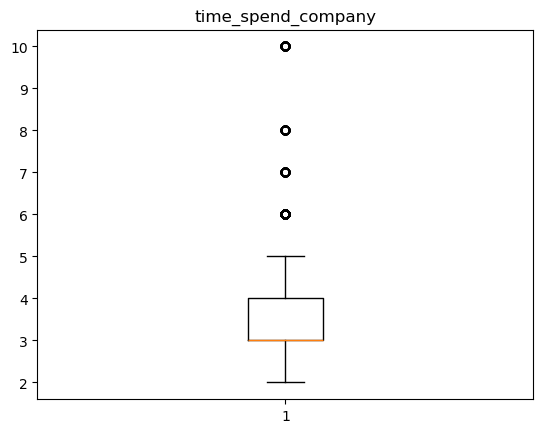

Q1= 3.0
Q2= 3.0
Q3= 4.0
IQR= 1.0
Upper_Whisker= 5.5
Lower_Whisker= 1.5


In [31]:
plt.figure()
plt.boxplot(df['time_spend_company'])
plt.title('time_spend_company')
plt.show()    
q1=df['time_spend_company'].quantile(0.25)
q3=df['time_spend_company'].quantile(0.75)
q2=df['time_spend_company'].quantile(0.50)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("IQR=",iqr)
print("Upper_Whisker=",upper_tail)
print("Lower_Whisker=",lower_tail)

In [32]:
df.loc[df['time_spend_company']>upper_tail]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [33]:
df.loc[df['time_spend_company']>upper_tail,'time_spend_company']=upper_tail

# Skewness

In [35]:
from scipy.stats import skew

In [36]:
for i in numerical_columns:
    print(i,"----",skew(df[i]))

number_project ---- 0.33211043493855935
average_montly_hours ---- 0.027204633327374373
time_spend_company ---- 0.6493046896899226
satisfaction_level ---- -0.5386342743478788
last_evaluation ---- -0.031682111330650055


In [37]:
num_col = df.select_dtypes(['int64','float64'])

In [38]:
num_col

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3.0,0,1,0
1,0.80,0.86,5,262,5.5,0,1,0
2,0.11,0.88,7,272,4.0,0,1,0
3,0.72,0.87,5,223,5.0,0,1,0
4,0.37,0.52,2,159,3.0,0,1,0
...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,5.5,1,0,1
11996,0.74,0.95,5,266,5.5,0,0,1
11997,0.85,0.54,3,185,5.5,0,0,1
11998,0.33,0.65,3,172,5.5,0,0,1


In [39]:
df["last_evaluation"].value_counts()

last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: count, Length: 65, dtype: int64

In [40]:
# Encoding Categorical Variables

In [41]:
l1=df.select_dtypes(["object"]).columns.tolist()
l1

['Department', 'salary']

In [42]:
df=pd.get_dummies(df,columns=['Department', 'salary']).astype(int)

In [43]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,5,262,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,3,259,5,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0,0,5,266,5,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0,0,3,185,5,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0,0,3,172,5,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


# Feature Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [46]:
for i in numerical_columns:
    df[i]=ms.fit_transform(df[[i]])

In [47]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.0,0.0,0.0,0.285047,0.333333,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.0,0.6,0.775701,1.000000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.0,0.0,1.0,0.822430,0.666667,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.0,0.0,0.6,0.593458,1.000000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.0,0.0,0.0,0.294393,0.333333,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.2,0.761682,1.000000,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.0,0.0,0.6,0.794393,1.000000,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.0,0.0,0.2,0.415888,1.000000,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.0,0.0,0.2,0.355140,1.000000,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [48]:
corr=df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,-0.004783,0.003717,-0.002322,-0.009171,0.003990,-0.040919,0.002183,-0.000468,-0.007021,...,-0.000051,0.001783,-0.010409,0.001102,-0.002090,0.004634,0.012429,-0.017514,0.007583,0.002080
last_evaluation,-0.004783,1.000000,0.042788,0.037825,0.087524,-0.012361,0.106383,-0.001948,-0.014953,0.003973,...,-0.003057,-0.000947,0.002192,-0.004043,-0.000035,-0.009749,0.007633,-0.022507,0.004252,0.008203
number_project,0.003717,0.042788,1.000000,0.331516,0.243636,-0.005612,0.030928,-0.000544,-0.001464,0.010077,...,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.002820,-0.000914,0.002484
average_montly_hours,-0.002322,0.037825,0.331516,1.000000,0.134502,-0.012860,0.070409,-0.004964,0.001007,0.004159,...,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.002499,-0.000675,0.002065
time_spend_company,-0.009171,0.087524,0.243636,0.134502,1.000000,-0.016852,0.264612,0.026398,-0.000110,0.000385,...,-0.010298,0.036758,0.006614,-0.004356,-0.000461,-0.015570,-0.005078,-0.005720,-0.006471,0.009687
Work_accident,0.003990,-0.012361,-0.005612,-0.012860,-0.016852,1.000000,-0.125436,0.029852,-0.009777,0.011793,...,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.002735,0.001580,-0.003108
left,-0.040919,0.106383,0.030928,0.070409,0.264612,-0.125436,1.000000,-0.044657,-0.003324,-0.029016,...,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,-0.094769,0.099113,-0.047214
promotion_last_5years,0.002183,-0.001948,-0.000544,-0.004964,0.026398,0.029852,-0.044657,1.000000,-0.034334,0.025610,...,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,0.063982,-0.076576,0.041601
Department_IT,-0.000468,-0.014953,-0.001464,0.001007,-0.000110,-0.009777,-0.003324,-0.034334,1.000000,-0.073779,...,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826,-0.010617,0.005370,0.000482
Department_RandD,-0.007021,0.003973,0.010077,0.004159,0.000385,0.011793,-0.029016,0.025610,-0.073779,1.000000,...,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.013363,-0.007301,0.014761


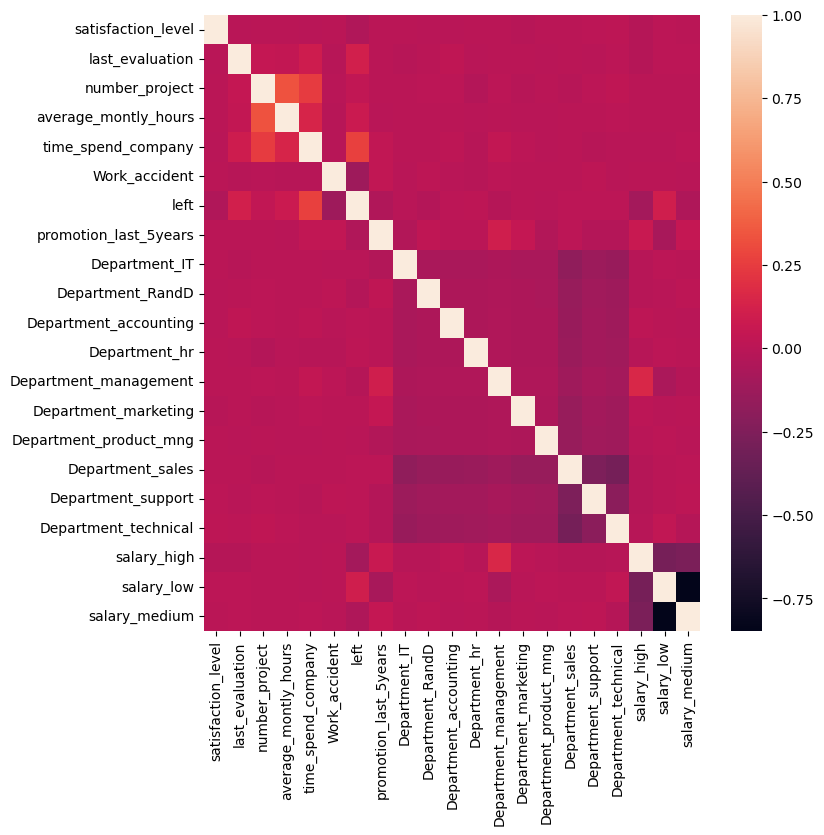

In [49]:
plt.figure(figsize=(8,8))
sns.heatmap(corr)
plt.show()

In [50]:
x = df.drop(columns=['left'])
y= df['left']

Splitting df into Traning and Testing:

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
6426,0.0,0.0,0.6,0.210280,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
288,0.0,0.0,0.6,0.635514,1.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5051,0.0,0.0,0.2,0.242991,0.333333,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
11132,0.0,0.0,0.4,0.154206,1.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3687,0.0,0.0,0.2,0.280374,0.333333,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,0.0,0.0,0.4,0.383178,1.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5200,0.0,0.0,0.4,0.560748,0.333333,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5399,0.0,0.0,0.6,0.439252,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
861,0.0,0.0,0.0,0.224299,0.333333,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [55]:
y_train

6426     0
288      1
5051     0
11132    0
3687     0
        ..
11973    0
5200     0
5399     0
861      1
7279     0
Name: left, Length: 9592, dtype: int32

In [56]:
x_test.shape

(2399, 20)

In [57]:
y_test

397      1
3107     0
9331     0
357      1
1326     1
        ..
9322     0
10440    0
3077     0
6113     0
3794     0
Name: left, Length: 2399, dtype: int32

In [58]:
df.shape

(11991, 21)

In [59]:
# Model Development:

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score

In [61]:
Logistic_Regression = LogisticRegression()

In [62]:
# Model Training 

In [63]:
Logistic_Regression.fit(x_train, y_train)

LogisticRegression()

In [64]:
# Model Predication:

In [65]:
y_pred = Logistic_Regression.predict(x_test)

In [66]:
residual=y_test-y_pred
residual

397      1
3107     0
9331     0
357      1
1326     1
        ..
9322     0
10440    0
3077     0
6113     0
3794     0
Name: left, Length: 2399, dtype: int32

In [67]:
Logistic_Regression.score(x_train, y_train)

0.8376772310258549

In [68]:
Logistic_Regression.score(x_test, y_test)

0.8365985827428095

****************Confusion Matrix***************
Confusion Matrix: 
 [[1976   22]
 [ 370   31]]
************************************************************


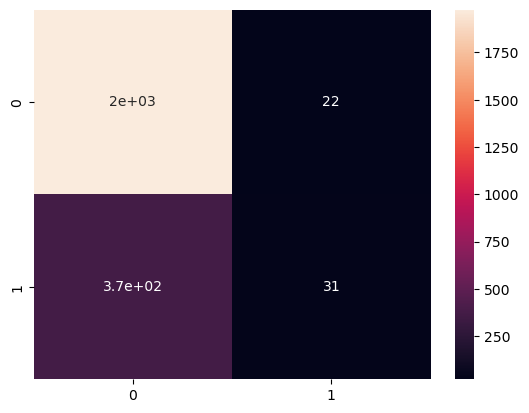

In [69]:
print('****************Confusion Matrix***************')
cn_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", cn_matrix)
print("*"*60)
sns.heatmap(cn_matrix,annot= True)
plt.show()

In [70]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2346
           1       0.08      0.58      0.14        53

    accuracy                           0.84      2399
   macro avg       0.53      0.71      0.52      2399
weighted avg       0.97      0.84      0.89      2399



In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1998
           1       0.58      0.08      0.14       401

    accuracy                           0.84      2399
   macro avg       0.71      0.53      0.52      2399
weighted avg       0.80      0.84      0.78      2399



In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [73]:
dt = DecisionTreeClassifier()

In [74]:
# Define the Decision Tree model
dt = DecisionTreeClassifier()

In [75]:
# Fit the model with the training data
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
y_pred = dt.predict(x_test)

In [77]:
dt.score(x_train,y_train)



0.9947873227689742

In [78]:
dt.score(x_test,y_test)

0.9349729053772405

****************Confusion Matrix***************
Confusion Matrix: 
 [[1921   77]
 [  79  322]]
************************************************************


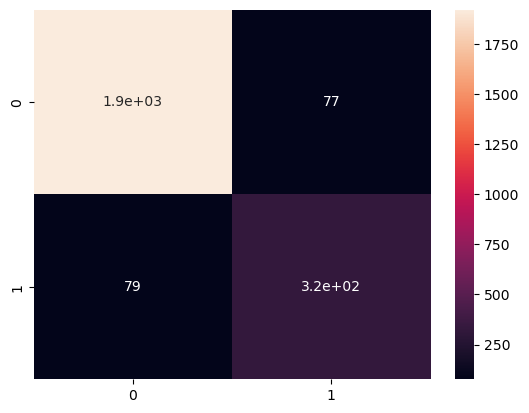

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1998
           1       0.81      0.80      0.81       401

    accuracy                           0.93      2399
   macro avg       0.88      0.88      0.88      2399
weighted avg       0.93      0.93      0.93      2399



In [79]:
print('****************Confusion Matrix***************')
cn_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", cn_matrix)
print("*"*60)
sns.heatmap(cn_matrix,annot= True)
plt.show()
print(classification_report(y_test, y_pred))

In [80]:
# gini:- impurity
# entropy :- information gain

In [81]:
hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}

In [82]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=hyperparameter, cv=5,n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2340 candidates, totalling 11700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             verbose=2)

In [83]:
# Output the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 18}


In [84]:
# Use the best model to make predictions
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=18)

In [85]:
train_accuracy = best_model.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9589241034195163


In [86]:
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.952897040433514


In [87]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9349729053772405
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1998
           1       0.81      0.80      0.81       401

    accuracy                           0.93      2399
   macro avg       0.88      0.88      0.88      2399
weighted avg       0.93      0.93      0.93      2399



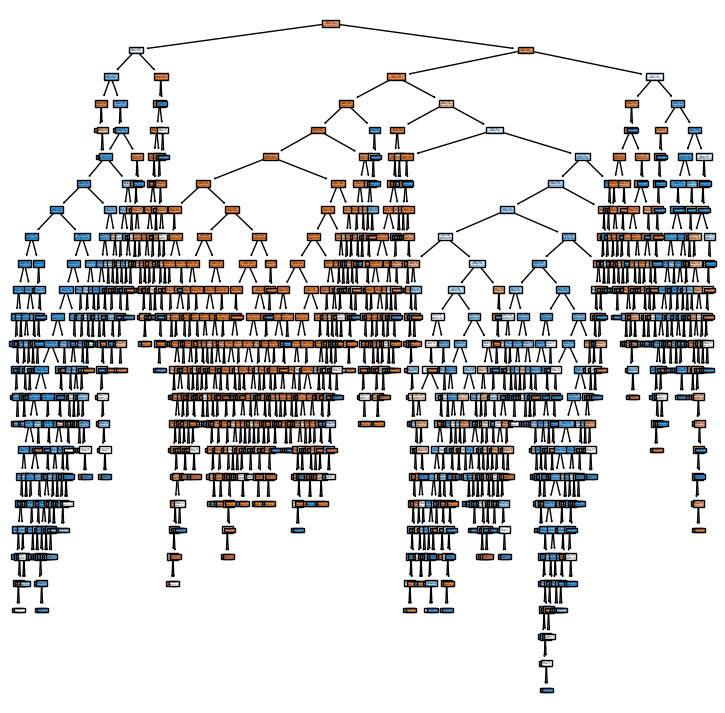

In [88]:
# Plot Tree
plt.figure(figsize=(9,9))  # Adjust the figure size if needed
plot_tree(dt, filled=True)
plt.show()

In [89]:
dt.get_depth()

25

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
model = RandomForestClassifier()

In [92]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [93]:
y_pred = model.predict(x_test)

****************Confusion Matrix***************
Confusion Matrix: 
 [[1942   56]
 [  73  328]]
************************************************************


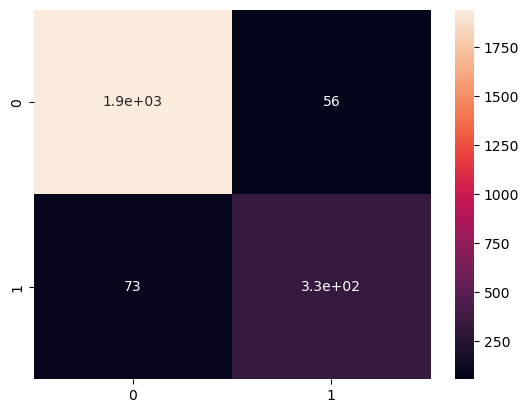

In [94]:

# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)

print('****************Confusion Matrix***************')
cn_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", cn_matrix)
print("*"*60)
sns.heatmap(cn_matrix,annot= True)
plt.show()

In [95]:
rf_model=RandomForestClassifier() # for random we use distributions method
hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}

In [96]:
gscv_dt_clf = RandomizedSearchCV(rf_model, hyperparameter, cv=5) # cv used for grid
gscv_dt_clf.fit(x_train, y_train)
gscv_dt_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=10)

In [97]:
rf_clf=gscv_dt_clf.best_estimator_

In [98]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=10)

In [99]:
rf_clf.score(x_train,y_train)

0.9155546288573811

In [100]:
rf_clf.score(x_test,y_test)

0.9166319299708212

****************Confusion Matrix***************
Confusion Matrix: 
 [[1948   50]
 [  55  346]]
************************************************************


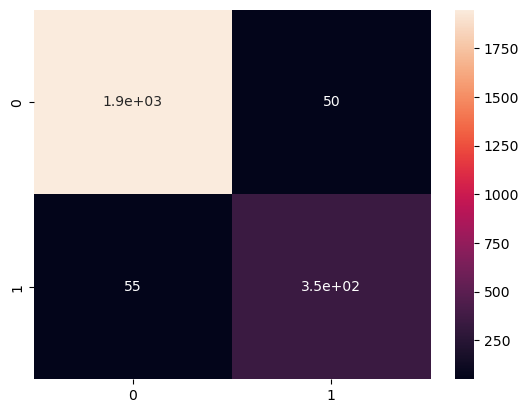

In [101]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)

print('****************Confusion Matrix***************')
cn_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", cn_matrix)
print("*"*60)
sns.heatmap(cn_matrix,annot= True)
plt.show()


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1998
           1       0.87      0.86      0.87       401

    accuracy                           0.96      2399
   macro avg       0.92      0.92      0.92      2399
weighted avg       0.96      0.96      0.96      2399



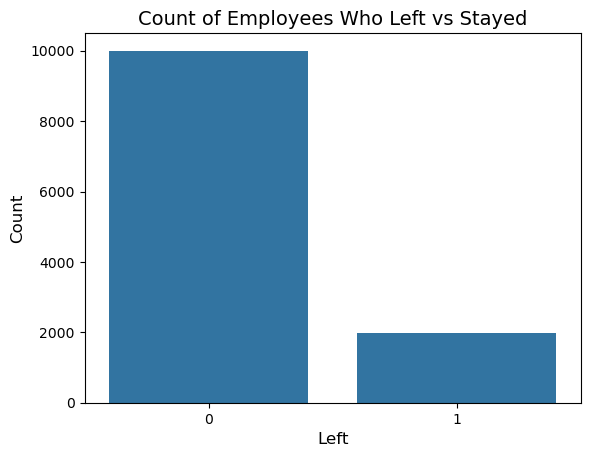

In [103]:
# to check data is balanced
sns.countplot(x=df['left'])
plt.xlabel('Left', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Employees Who Left vs Stayed', fontsize=14)
plt.show()

In [104]:
# SMOTE
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

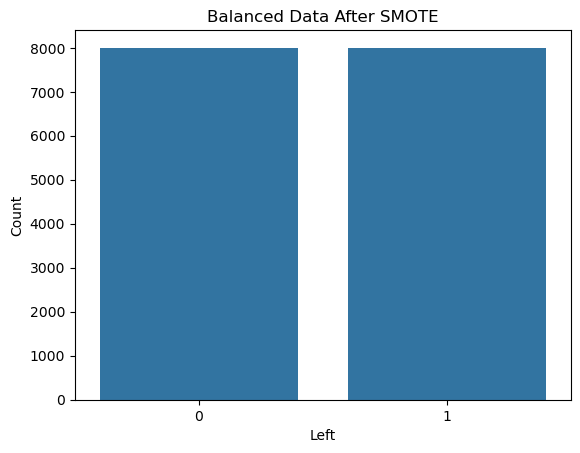

In [105]:
# Now use the DataFrame in the countplot
sns.countplot(x=y_smote)
plt.title('Balanced Data After SMOTE')
plt.xlabel('Left')
plt.ylabel('Count')
plt.show()

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1998
           1       0.34      0.71      0.46       401

    accuracy                           0.72      2399
   macro avg       0.63      0.72      0.63      2399
weighted avg       0.83      0.72      0.75      2399



In [107]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1998
           1       0.82      0.84      0.83       401

    accuracy                           0.94      2399
   macro avg       0.90      0.90      0.90      2399
weighted avg       0.94      0.94      0.94      2399



In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = RandomizedSearchCV(estimator=dt, param_distributions=hyperparameter)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1998
           1       0.80      0.88      0.84       401

    accuracy                           0.94      2399
   macro avg       0.89      0.92      0.90      2399
weighted avg       0.95      0.94      0.94      2399



In [109]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomizedSearchCV(estimator=rf_model, param_distributions=hyperparameter)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1998
           1       0.69      0.89      0.78       401

    accuracy                           0.91      2399
   macro avg       0.83      0.91      0.86      2399
weighted avg       0.93      0.91      0.92      2399



In [110]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1998
           1       0.83      0.89      0.86       401

    accuracy                           0.95      2399
   macro avg       0.91      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399



In [111]:
# Pickel File
import pickle

In [112]:
with open('classifier.pkl', 'wb') as file:
    pickle.dump(model, file)

# Conclusion:
After performing EDA and applying classification algorithms to predict employee attrition, several key insights were discovered. Factors such as job satisfaction, work-life balance, years at the company, and monthly income were identified as significant contributors to employee turnover. The best-performing machine learning model[XGBClassifier] achieved an accuracy of '96%', which provides a reliable tool for predicting employee attrition. These insights can guide the company's HR strategy by focusing on improving employee engagement, offering competitive compensation, and ensuring a balanced workload to minimize future attrition.